## Exercise 7 - Data visualization
- Different data sources will be utilized in this exercise.
- **Important**: Remember to adjust the size of each visualized graph using figsize parameter for plot method for better viewing experience!

1 Read the earthquakes.csv file and save its content into a variable. Then use bar chart to visualize magnitude values being 8.2 or over so that date values will be presented in x-axle and magnitude in y-axle.

In [8]:
import pandas as pd

earthquakes = pd.read_csv('data_files/earthquakes.csv', delimiter=",")

original_eq = pd.DataFrame(earthquakes)

eq_data = original_eq[["Date", "Magnitude"]]

eq_data = eq_data[(eq_data['Magnitude'] > 8.2)]


<AxesSubplot:xlabel='Date'>

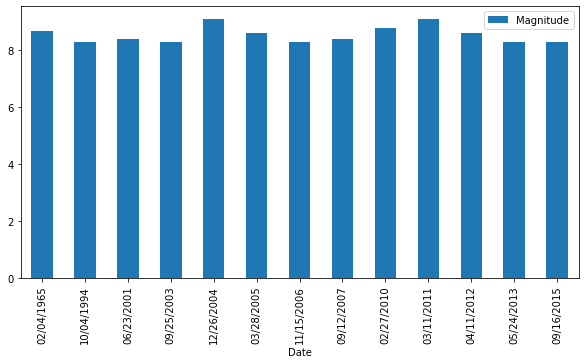

In [9]:
eq_data.plot(kind="bar", x="Date", y="Magnitude", figsize=(10,5))

2 Filter earthquake data so that all occurrances between time values 10:00 - 12:00 will be visualized with line chart. Group this data so that the average (mean) depth values will be presented for each source.

<AxesSubplot:xlabel='Source'>

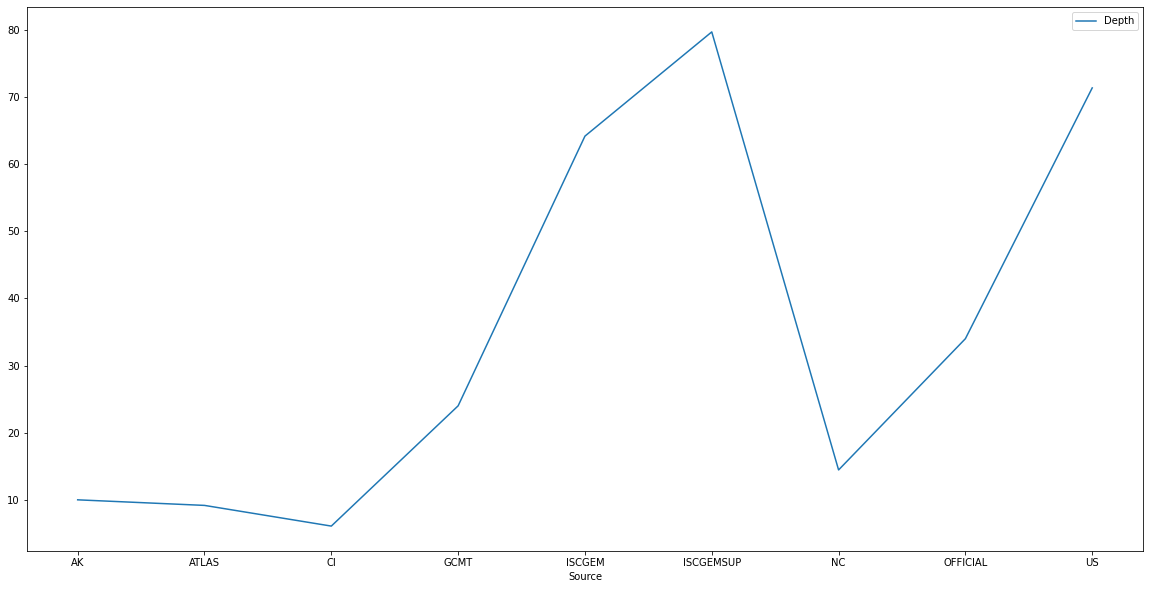

In [10]:
pd.options.mode.chained_assignment = None

time_eq = original_eq[(original_eq['Time'].str.match(r'^\d\d:\d\d:\d\d$'))]

time_eq['Time']= pd.to_datetime(time_eq['Time'], format="%H:%M:%S")

start_time = pd.to_datetime('1/1/1900 10:00')
end_time = pd.to_datetime('1/1/1900 12:00')

time_eq = time_eq[(time_eq['Time'] > start_time) & (time_eq['Time'] < end_time)]

time_eq['Time'] = [time.strftime("%H:%M:%S") for time in time_eq['Time']]



time_eq.groupby('Source').mean().plot(kind='line', y='Depth', figsize=(20,10))

3 Read the gamedata.json file to a new variable. Visualize the data with pie chart so that share count will be counted for each Steam rating (in other words how many percentage out of all games have received which rating).

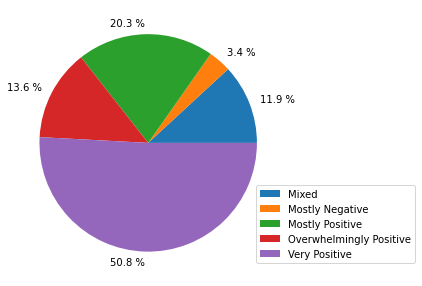

In [11]:
games = pd.read_json("data_files/gamedata.json")
games = games.groupby("steamRatingText").sum()
label_list = [str(round(100 * (i / sum(games["storeID"])),1)) + ' %' for i in games["storeID"]]
games.plot(kind="pie",y="storeID",ylabel="", labels=label_list, figsize=(5,5), use_index=True).legend(games.index, loc="right", bbox_to_anchor=(1.5,0.2))

4 Use the same game_data.json as above and create a scatter plot where you compare the relationships for metacriticScore and salePrice.

<AxesSubplot:xlabel='Metacritic Score', ylabel='Sale Price (€)'>

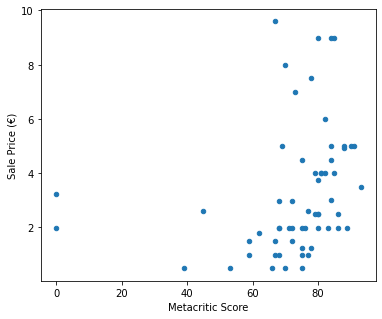

In [12]:
games = pd.read_json("data_files/gamedata.json")

games.plot(kind="scatter",x="metacriticScore", xlabel="Metacritic Score",y="salePrice", ylabel="Sale Price (€)",figsize=(6,5))

5 Use earthquake data you read earlier and create a scatter plot for magnitude values using Longitude and Latitude values for x- and y-axles correspondingly. In addition, use colormap for magnitude values.

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

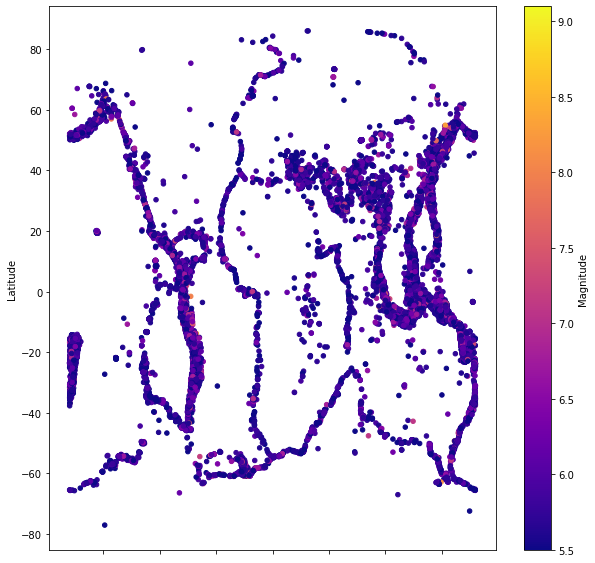

In [14]:
 original_eq.plot(kind="scatter", x="Longitude", y="Latitude", figsize=(10,10), c="Magnitude", colormap="plasma")